In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import seaborn
from sklearn import ensemble
seaborn.set()

In [66]:
cv_forest = pd.read_csv('results/forest_CV_new.csv')
cv_boost1 = pd.read_csv('results/booster_CV_new.csv')
cv_boost2 = pd.read_csv('results/booster_CV_new2.csv')
cv_boost = pd.concat([cv_boost1, cv_boost2])
cv_boost = cv_boost.reset_index()

# Forest

In [67]:
best_forest = cv_forest.loc[cv_forest.rank_test_score.argmin()]
grouped = cv_forest.groupby(["param_max_features", "param_min_samples_leaf", "param_n_estimators"]).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()

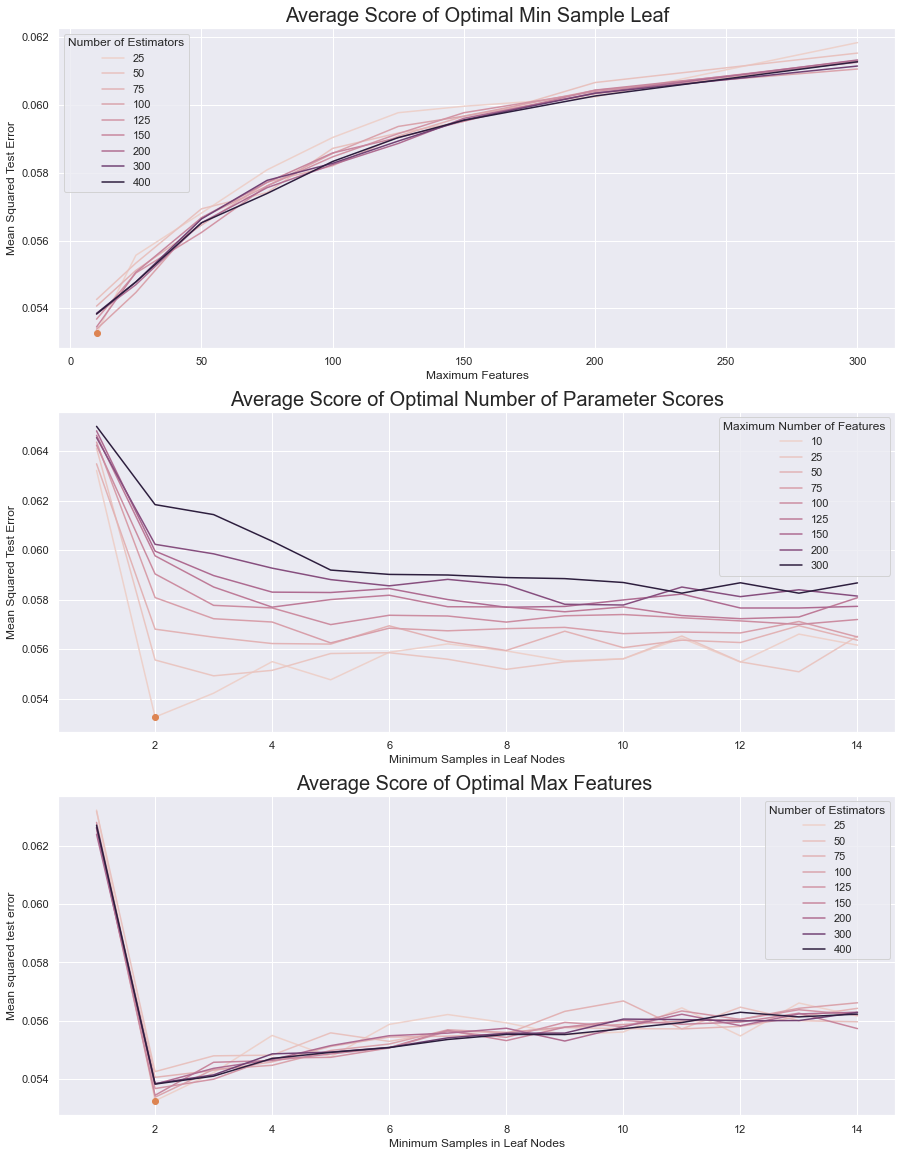

In [68]:

fig, ax = plt.subplots(3,1, figsize = (15, 20))
g = seaborn.lineplot(data = grouped[grouped.param_min_samples_leaf == best_forest.param_min_samples_leaf ],
                 x = 'param_max_features',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])
g.legend_.set_title('Number of Estimators')
ax[0].set_title('Average Score of Optimal Min Sample Leaf', fontsize = 20)
ax[0].set_xlabel('Maximum Features')
ax[0].set_ylabel('Mean Squared Test Error')
ax[0].plot(best_forest.param_max_features, -best_forest.mean_test_score,  'o')



g = seaborn.lineplot(data = grouped[grouped.param_n_estimators == best_forest.param_n_estimators ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[1])
g.legend_.set_title('Maximum Number of Features')
ax[1].set_title('Average Score of Optimal Number of Parameter Scores',  fontsize = 20)
ax[1].set_xlabel('Minimum Samples in Leaf Nodes')
ax[1].set_ylabel('Mean Squared Test Error')
ax[1].plot(best_forest.param_min_samples_leaf, -best_forest.mean_test_score,  'o')

g = seaborn.lineplot(data = grouped[grouped.param_max_features == best_forest.param_max_features ],
                 x = 'param_min_samples_leaf',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[2])
g.legend_.set_title('Number of Estimators')
ax[2].set_title('Average Score of Optimal Max Features ', fontsize = 20)
ax[2].set_xlabel('Minimum Samples in Leaf Nodes')
ax[2].set_ylabel('Mean squared test error')

ax[2].plot(best_forest.param_min_samples_leaf, -best_forest.mean_test_score,  'o')#, legend ='h')

plt.show()

# Boost

In [75]:
best_boost = cv_boost.loc[cv_boost.rank_test_score.argmin()]

grouped = cv_boost.groupby(["param_max_depth", "param_max_features", "param_n_estimators", 'param_learning_rate']).agg({'mean_test_score': lambda x: -x.mean(), 'std_test_score': lambda x: x.mean()}).reset_index()
best_boost.param_learning_rate

0.1718571428571428

Text(0, 0.5, 'Mean Squared Test Error')

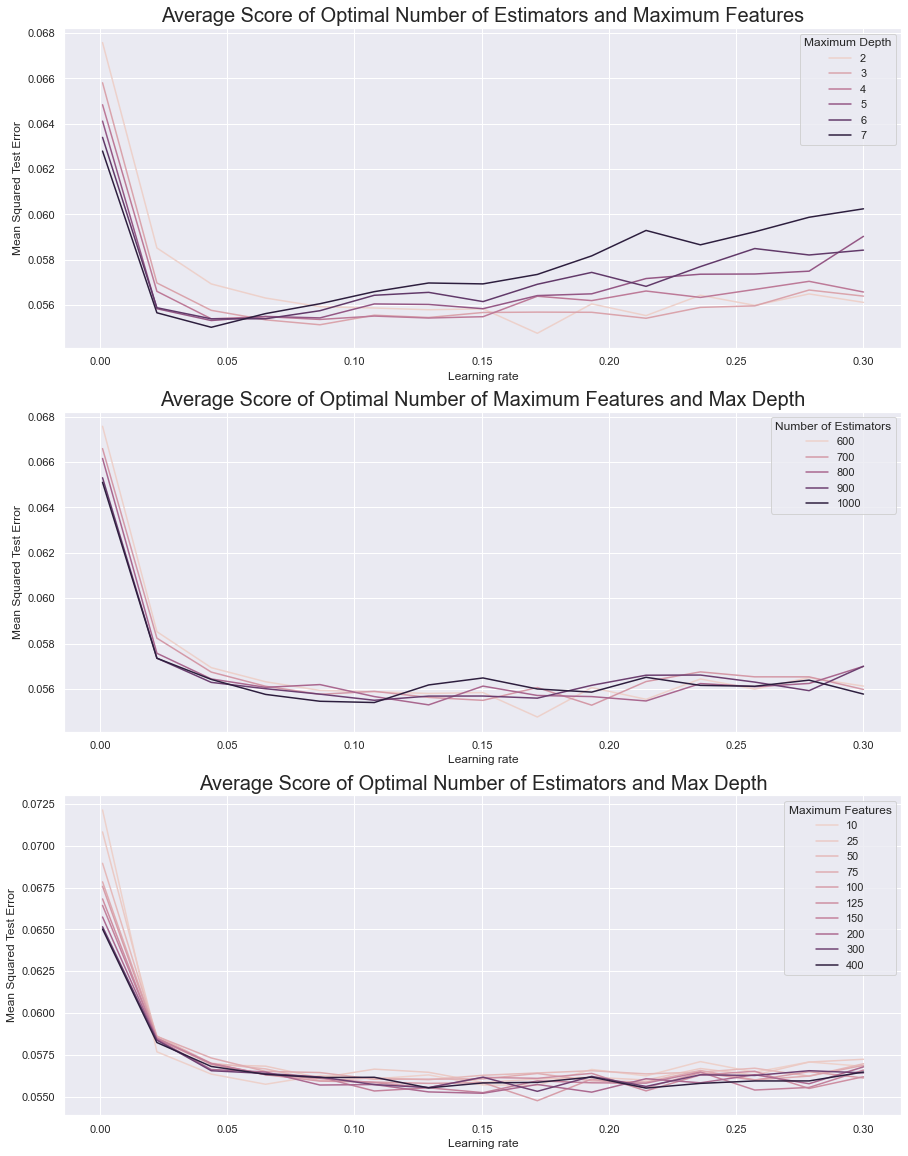

In [90]:
fig, ax = plt.subplots(3,1, figsize = (15, 20))
g = seaborn.lineplot(data = grouped[grouped.param_n_estimators == best_boost.param_n_estimators * (grouped.param_max_features == best_boost.param_max_features)],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_max_depth',
                 legend = 'full',
                #  style = 'param_min_samples_leaf',
                 ax = ax[0])
g.legend_.set_title('Maximum Depth')
ax[0].set_title('Average Score of Optimal Number of Estimators and Maximum Features', fontsize = 20)
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Mean Squared Test Error')


g = seaborn.lineplot(data = grouped[(grouped.param_max_features == best_boost.param_max_features) * (grouped.param_max_depth == best_boost.param_max_depth)],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax[1])

g.legend_.set_title('Number of Estimators')                
ax[1].set_title('Average Score of Optimal Number of Maximum Features and Max Depth', fontsize = 20)
ax[1].set_xlabel('Learning rate')
ax[1].set_ylabel('Mean Squared Test Error')

g = seaborn.lineplot(data = grouped[(grouped.param_n_estimators == best_boost.param_n_estimators) * grouped.param_max_depth == best_boost.param_max_depth  ],
                 x = 'param_learning_rate',
                 y = 'mean_test_score',
                 hue = 'param_max_features',
                 legend = 'full',
                 ax = ax[2])

g.legend_.set_title('Maximum Features') 
ax[2].set_title('Average Score of Optimal Number of Estimators and Max Depth', fontsize = 20)
ax[2].set_xlabel('Learning rate')
ax[2].set_ylabel('Mean Squared Test Error')



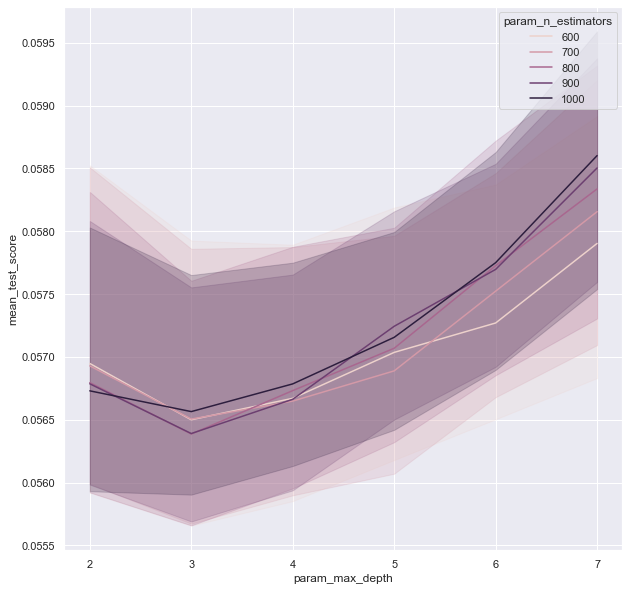

In [97]:
fig, ax =  plt.subplots(figsize =  (10,10))
g = seaborn.lineplot(data = grouped[(grouped.param_max_features == best_boost.param_max_features)],
                 x = 'param_max_depth',
                 y = 'mean_test_score',
                 hue = 'param_n_estimators',
                 legend = 'full',
                 ax = ax)

#g.legend_.set_title('Maximum Features') 
#ax.set_title('Average Score of Optimal Number of Estimators and Max Depth', fontsize = 20)
#ax.set_xlabel('Learning rate')
#ax.set_ylabel('Mean Squared Test Error')

# Feature imporatnce

In [100]:
df_train = pd.read_csv("data/train_data.csv")
df_test = pd.read_csv("data/test_data.csv")


X = df_train.drop(['LoadFactor','ScheduleTime'], axis = 1)
X_test = df_test.drop(['ScheduleTime'], axis = 1)

y = df_train.LoadFactor



index                                                                960
Unnamed: 0                                                           960
mean_fit_time                                                  11.953682
std_fit_time                                                         0.0
mean_score_time                                                 0.120347
std_score_time                                                       0.0
param_learning_rate                                             0.171857
param_max_depth                                                        2
param_max_features                                                   100
param_n_estimators                                                   600
params                 {'learning_rate': 0.17185714285714285, 'max_de...
split0_test_score                                              -0.054762
mean_test_score                                                -0.054762
std_test_score                                     

In [101]:
model = ensemble.GradientBoostingRegressor(max_depth = best_boost.param_max_depth,max_features = best_boost.param_max_features, n_estimators = best_boost.param_n_estimators, learning_rate =best_boost.param_learning_rate)
model.fit(X, y)



GradientBoostingRegressor(learning_rate=0.1718571428571428, max_depth=2,
                          max_features=100, n_estimators=600)

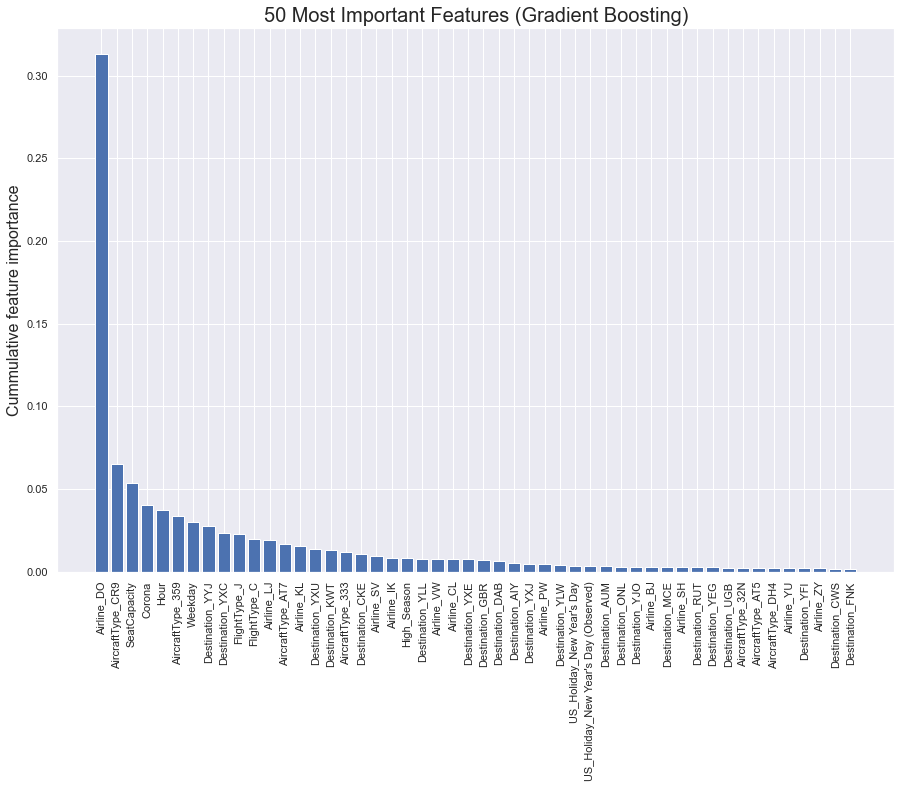

In [108]:
n = 50

idx = np.argsort(model.feature_importances_)[::-1]

importance = model.feature_importances_[idx[:n]]
names = X.columns[idx[:n]]

fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.bar(range(n), importance)
ax.set_xticks(range(n))
ax.set_xticklabels(names, rotation = 90)
ax.set_title(f'{n} Most Important Features (Gradient Boosting)', fontsize = 20)
ax.set_ylabel('Cummulative feature importance', fontsize = 16)
plt.show()

In [109]:

forest = RandomForestRegressor(n_estimators=best_forest.param_n_estimators, min_samples_leaf=best_forest.param_min_samples_leaf, max_features=best_forest.param_max_features,  n_jobs = -1, verbose = True)
forest.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.6s finished


RandomForestRegressor(max_features=10, min_samples_leaf=2, n_estimators=25,
                      n_jobs=-1, verbose=True)

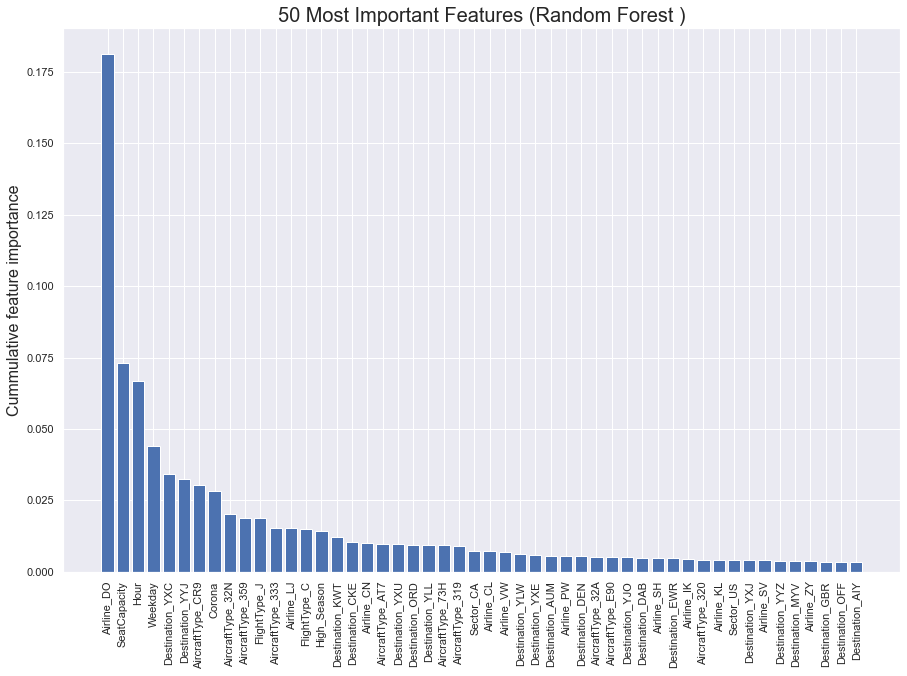

In [110]:
n = 50

idx = np.argsort(forest.feature_importances_)[::-1]

importance = forest.feature_importances_[idx[:n]]
names = X.columns[idx[:n]]

fig, ax = plt.subplots(1,1, figsize = (15,10))
ax.bar(range(n), importance)
ax.set_xticks(range(n))
ax.set_xticklabels(names, rotation = 90)
ax.set_title(f'{n} Most Important Features (Random Forest )', fontsize = 20)
ax.set_ylabel('Cummulative feature importance', fontsize = 16)
plt.show()